In [47]:
import pandas as pd 
import numpy as np

In [48]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv',sep = ',',header = 0) 

In [49]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [50]:
#drop id column
data.drop('id', inplace=True, axis=1)

In [51]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# Correlation

In [12]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


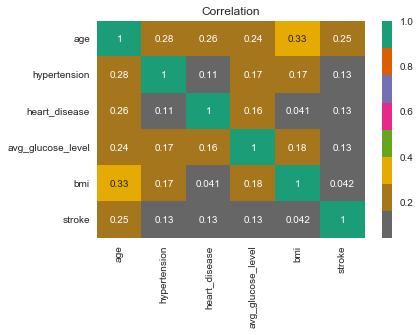

In [33]:
sns.heatmap(data.corr(),cmap='Dark2_r',annot=True)
plt.title("Correlation")
plt.show()

In [72]:
#Change other columns to numeric data
Another_data = data.copy()
Another_data['gender'] = np.where((Another_data['gender'] == "Female"), 1, 0)
Another_data['ever_married'] = np.where((Another_data['ever_married'] == "Yes"), 1, 0)
Another_data['Residence_type'] = np.where((Another_data['Residence_type'] == "Urban"), 1, 0)
Another_data['work_type'] = Another_data['work_type'].factorize()[0]
Another_data['smoking_status'] = Another_data['smoking_status'].factorize()[0]
Another_data.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,NaN,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1
5,0,81.0,0,0,1,0,1,186.21,29.0,0,1
6,0,74.0,1,1,1,0,0,70.09,27.4,1,1
7,1,69.0,0,0,0,0,1,94.39,22.8,1,1
8,1,59.0,0,0,1,0,0,76.15,NaN,3,1
9,1,78.0,0,0,1,0,1,58.57,24.2,3,1


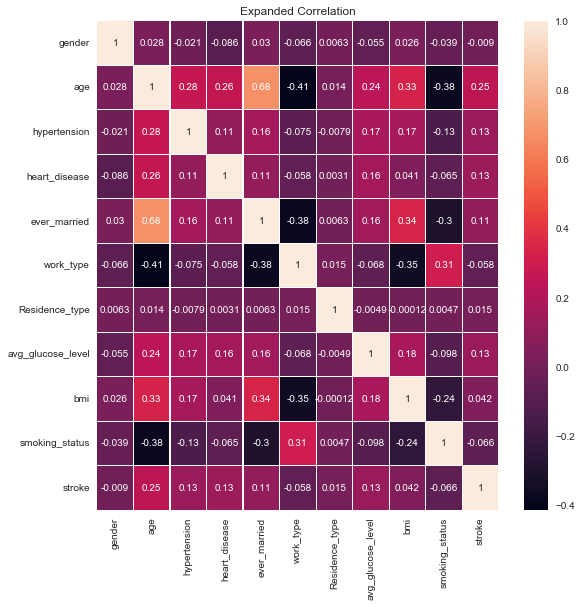

In [77]:
plt.figure(figsize=(9,9))
sns.heatmap(Another_data.corr(),annot=True, linewidths=0.1)
plt.title("Expanded Correlation")
plt.show()

## Residence-type and Avg_glucose_level Analysis

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

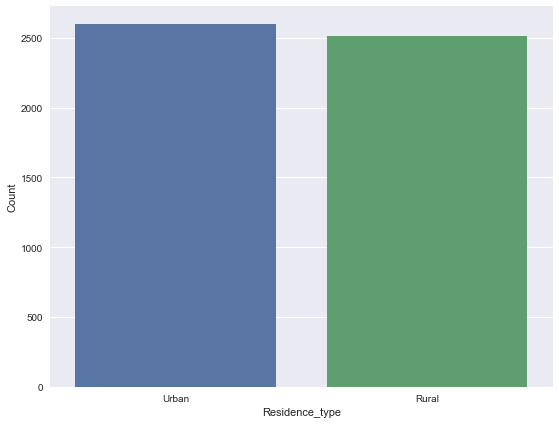

In [7]:
fig, ax= plt.subplots(figsize=(9,7))
sns.countplot(x='Residence_type', data=data, ax=ax)
plt.xlabel("Residence_type")
plt.ylabel("Count")
plt.show()

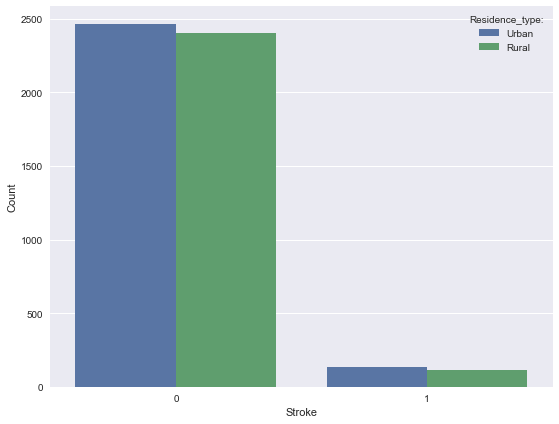

In [8]:
fig, ax= plt.subplots(figsize=(9,7))
sns.countplot(x="stroke",hue = "Residence_type", data=data, ax=ax)
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.legend(loc='upper right', title='Residence_type:', labels=['Urban','Rural'])
plt.show()

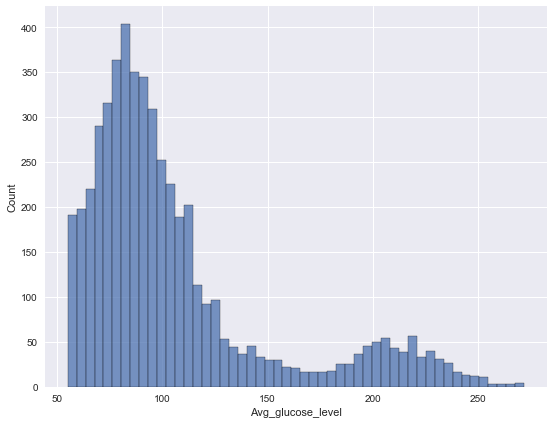

In [9]:
fig, ax= plt.subplots(figsize=(9,7))
sns.histplot(x="avg_glucose_level", data=data, ax=ax)
plt.xlabel("Avg_glucose_level")
plt.ylabel("Count")
#plt.legend(loc='upper right', title='Residence_type:', labels=['Urban','Rural'])
plt.show()

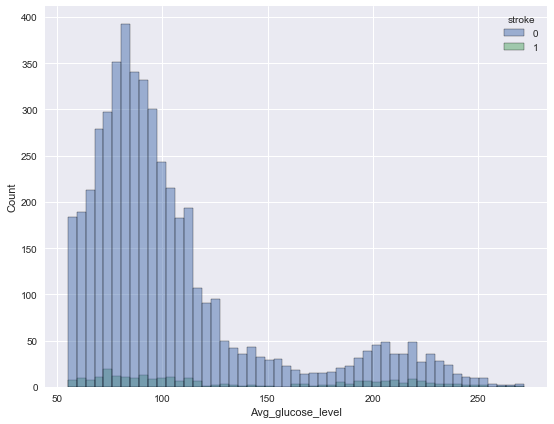

In [10]:
fig, ax= plt.subplots(figsize=(9,7))
sns.histplot(x="avg_glucose_level",hue = "stroke", data=data, ax=ax)
plt.xlabel("Avg_glucose_level")
plt.ylabel("Count")
#plt.legend(loc='upper right', title='Residence_type:', labels=['Urban','Rural'])
plt.show()

### Multivariate Analysis 

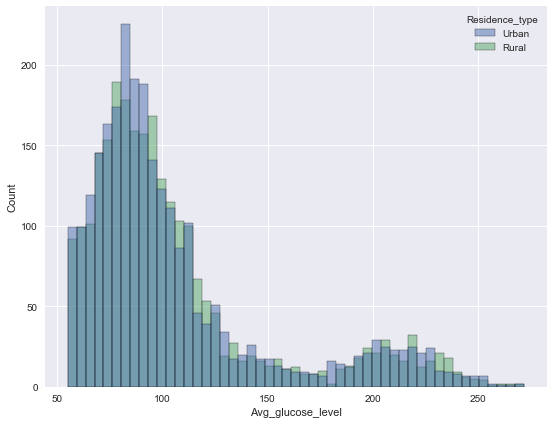

In [22]:
plt.figure(figsize=(9,7))
sns.histplot(x="avg_glucose_level",hue = "Residence_type", data=data)
plt.xlabel("Avg_glucose_level")
plt.ylabel("Count")
#plt.legend(loc='upper right', title='Residence_type:', labels=['Urban','Rural'])
plt.show()

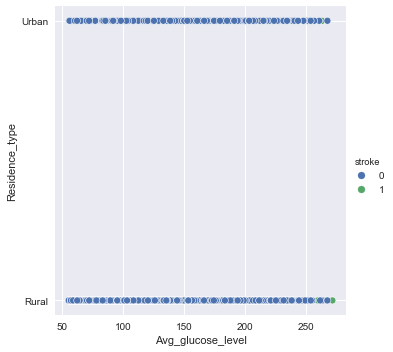

In [20]:
sns.relplot(x="avg_glucose_level",y = "Residence_type",hue = "stroke", data=data)
plt.xlabel("Avg_glucose_level")
plt.ylabel("Residence_type")
plt.show()
#Actually 

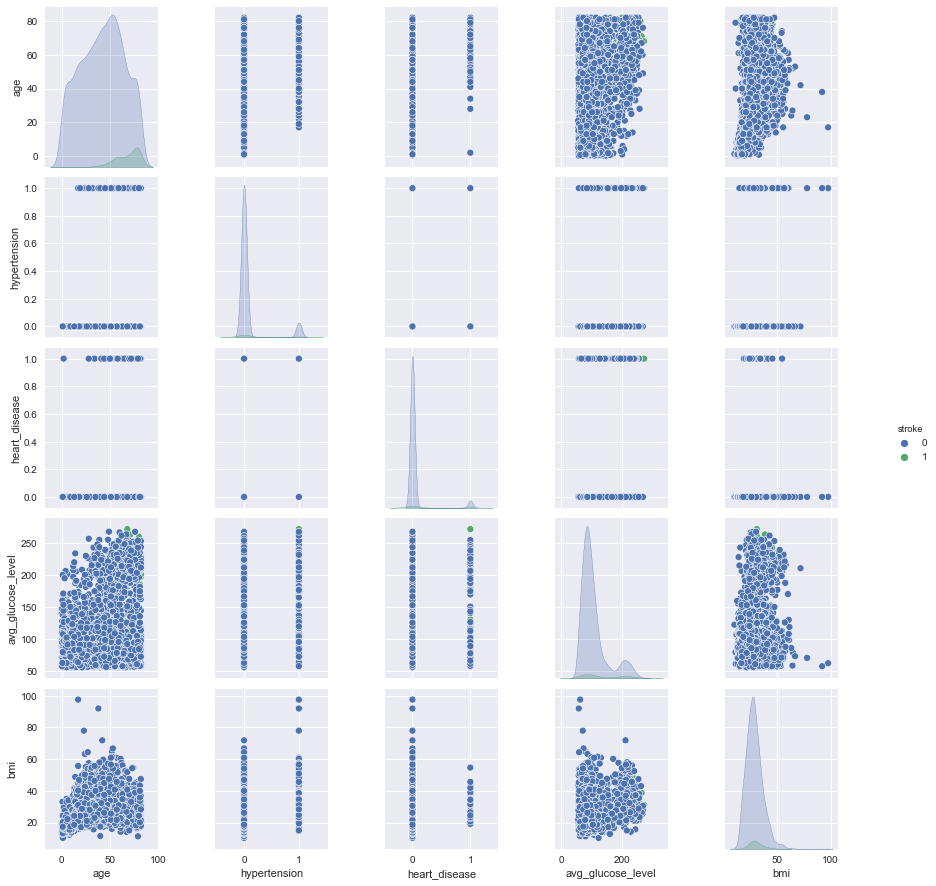

In [21]:
sns.pairplot(data, hue = 'stroke')